Mean Squared Error: 59.278279195694864


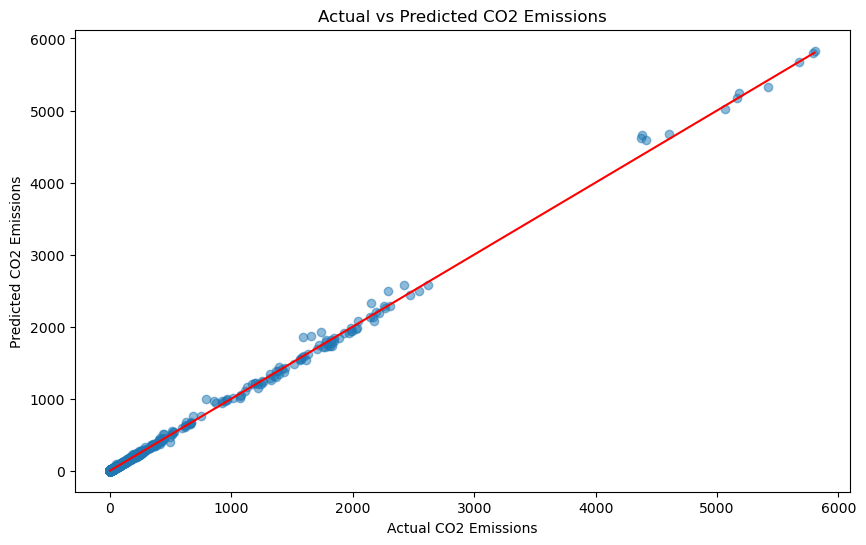

In [1]:
# filepath: /Users/admin/Documents/Programming/ds-and-ml-python/handsOnML/dsci_sem_draft_01/linear_regression_emissions.ipynb

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the data
filepath = '/Users/admin/Documents/Programming/ds-and-ml-python/handsOnML/dsci_sem_draft_01/emissions.csv'
data = pd.read_csv(filepath)

# Select features and target variable
features = data[['year', 'state-name', 'sector-name', 'fuel-name']]
target = data['value']

# Convert categorical features to numerical using one-hot encoding
features = pd.get_dummies(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Scatter plot to show variation between y_test and y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line y=x for reference
plt.show()